In [ ]:
#Setting the working directory to the project folder, easily access Git
%cd "C:/Users/siand/Downloads/Exeter/BEE2041 Data Science/Empirical Project"


C:\Users\siand\Downloads\Exeter\BEE2041 Data Science\Empirical Project


In [256]:
%cd "C:/Users/siand/Downloads/Exeter/BEE2041 Data Science/Empirical Project/misogyny-in-lyrics/data/Raw"
#Import pandas for data manipulation & loading the dataset
import pandas as pd

df_rawdata = pd.read_csv("Full_Billboard_year_end_hot_100_USA.csv", encoding='latin1')
print(len(df_rawdata))

C:\Users\siand\Downloads\Exeter\BEE2041 Data Science\Empirical Project\misogyny-in-lyrics\data\Raw
6789


In [140]:
#Filtering relevant 50 years + top 50 of each year
df_filtered = df_rawdata[(df_rawdata['Year'] >= 1972) & (df_rawdata['Year'] <= 2021)].copy()

#Extracting numeric ranking from No. column due to formatting, convert to int
df_filtered['No.'] = df_filtered['No.'].astype(str).str.extract(r'(\d+)')
df_filtered['No.'] = df_filtered['No.'].astype(int)
df_filtered = df_filtered[df_filtered['No.'] <= 50]

df_filtered #Clarify row numbers and view dataset

,No.,Title,Artist(s),Year
1789,1,The First Time Ever I Saw Your Face,Roberta Flack,1972
1790,2,Alone Again (Naturally),Gilbert O'Sullivan,1972
1791,3,American Pie,Don McLean,1972
1792,4,Without You,Harry Nilsson,1972
1793,5,The Candy Man,Sammy Davis Jr.,1972
...,...,...,...,...
6734,46,Need to Know,Doja Cat,2021
6735,47,Wants and Needs,Drake featuring Lil Baby,2021
6736,48,Way 2 Sexy,Drake featuring Future and Young Thug,2021
6737,49,Telepatí­a,Kali Uchis,2021


In [ ]:
import lyricsgenius #Import to access Genius Lyrics API
import time

#Using Genius Access Token to set up the API client
genius = lyricsgenius.Genius("FUkh9geZ4oUUMJkC2tTdDRl8PMjI-BCocha0AnShIdv-owl6OxhkhrQj9xijAK_F", 
                             skip_non_songs=True,
)


In [118]:
#Defining the function using Genius API to get lyrics
def get_lyrics(title, artist):
    try:
        song = genius.search_song(title, artist)
        return song.lyrics if song else None
    except Exception as e:
        print(f"Error fetching '{title}' by {artist}: {e}")
        return None


In [ ]:
#Scrape the lyrics, showing progress, pause to avoid the API rate limits
lyrics = []

for i, row in df.iterrows():
    title = row['Title']
    artist = row['Artist(s)']
    
    print(f"Fetching lyrics for: {title} by {artist}...")
    lyric = get_lyrics(title, artist)
    lyrics.append(lyric)
    
    time.sleep(1) 

Fetching lyrics for: The First Time Ever I Saw Your Face by Roberta Flack...
Searching for "The First Time Ever I Saw Your Face" by Roberta Flack...
Done.
Fetching lyrics for: Alone Again (Naturally) by Gilbert O'Sullivan...
Searching for "Alone Again (Naturally)" by Gilbert O'Sullivan...
Done.
Fetching lyrics for: American Pie by Don McLean...
Searching for "American Pie" by Don McLean...
Done.
Fetching lyrics for: Without You by Harry Nilsson...
Searching for "Without You" by Harry Nilsson...
Done.
Fetching lyrics for: The Candy Man by Sammy Davis Jr....
Searching for "The Candy Man" by Sammy Davis Jr....
Done.
Fetching lyrics for: I Gotcha by Joe Tex...
Searching for "I Gotcha" by Joe Tex...
Done.
Fetching lyrics for: Lean on Me by Bill Withers...
Searching for "Lean on Me" by Bill Withers...
Done.
Fetching lyrics for: Baby, Don't Get Hooked on Me by Mac Davis...
Searching for "Baby, Don't Get Hooked on Me" by Mac Davis...
Done.
Fetching lyrics for: Brand New Key by Melanie...
Searc

In [153]:
#loading the lyrics from the json file to a list as we are not running the webscrape again to get the lyrics
%cd "C:/Users/siand/Downloads/Exeter/BEE2041 Data Science/Empirical Project/misogyny-in-lyrics/data/Processed"
# Load the dataset with lyrics already saved
df_json = pd.read_json("lyrics_1972_2021.json")  # or .csv

# Rebuild the lyrics list
lyrics = df_json["Lyrics"].tolist()

# Now you can use the lyrics list again
print(lyrics[:5])  # Just to confirm it's working

C:\Users\siand\Downloads\Exeter\BEE2041 Data Science\Empirical Project\misogyny-in-lyrics\data\Processed
["16 ContributorsThe First Time Ever I Saw Your Face Lyrics[Verse 1]\nThe first time, ever I saw your face\nI thought the sun rose in your eyes\nAnd the moon and the stars\nWere the gifts you gave\nTo the dark, and the endless skies\n\n[Verse 2]\nAnd the first time, ever I kissed your mouth\nI felt the earth move in my hand\nLike the trembling heart\nOf a captive bird\nThat was there, at my command\nMy love\n\n[Verse 3]\nAnd the first time, ever I lay with you\nI felt your heart so close to mine\nAnd I knew our joy\nWould fill the earth\nAnd last, 'til the end of time\nMy love\n\n[Outro]\nThe first time, ever I saw\nYour face\nYour face\nYour face\nYour face", '50 ContributorsAlone Again (Naturally) Lyrics[Verse 1]\nOh, in a little while from now\nIf I\'m not feeling any less sour\nI promised myself\nTo treat myself\nAnd visit a nearby tower\n\nAnd climbing to the top\nWill throw my

In [154]:
#Adding the lyrics list as a column called "Lyrics" to a new df 
df_withlyrics = df_filtered.copy()
df_withlyrics["Lyrics"] = lyrics

# Save to files
df_withlyrics.to_csv("lyrics_1972_2021.csv", index=False)
df_withlyrics.to_json("lyrics_1972_2021.json", orient="records", force_ascii=False, indent=2)

In [275]:
df_json.tail(250) #read the json file c:\Users\siand\Downloads\Exeter\BEE2041 Data Science\Empirical Project\misogyny-in-lyrics\data\Processed\lyrics_1972_2021.json and confirms missing last 5 years

,No.,Title,Artist(s),Year,Lyrics
2500,26,Drip Too Hard,Lil Baby and Gunna,2019,None
2501,26,Drip Too Hard,Lil Baby and Gunna,2019,5 ContributorsTranslationsEnglishTürkçeDanskLi...
2502,27,Someone You Loved,Lewis Capaldi,2019,None
2503,27,Someone You Loved,Lewis Capaldi,2019,227 ContributorsTranslationsSvenskaEspañolPort...
2504,28,Ransom,Lil Tecca,2019,None
...,...,...,...,...,...
2745,48,Way 2 Sexy,Drake featuring Future and Young Thug,2021,2 ContributorsTranslationsEnglishTürkçeEspañol...
2746,49,Telepatí­a,Kali Uchis,2021,None
2747,49,Telepatí­a,Kali Uchis,2021,None
2748,50,Whoopty,CJ,2021,None


In [ ]:
%cd "C:/Users/siand/Downloads/Exeter/BEE2041 Data Science/Empirical Project/misogyny-in-lyrics/data/Raw"
import lyricsgenius
import pandas as pd
import time

# Set up the Genius API client
genius = lyricsgenius.Genius("9ai6TZ9Im0CTUKQp0mP13oC0fbgVlYiUlqoHhtn00cmecDo98cJ8hzVpdsd2rAku", 
                             skip_non_songs=True,
                             timeout=15)

# Filter only top 50 songs from 2017–2021
df_missing = df_filtered[
    (df["Year"] >= 2017) & 
    (df["Year"] <= 2021) & 
].reset_index(drop=True)

# Define scraping function
def get_lyrics(title, artist):
    try:
        song = genius.search_song(title, artist)
        return song.lyrics if song else None
    except Exception as e:
        print(f"Error fetching '{title}' by {artist}: {e}")
        return None

# Scrape
lyrics2 = []

for i, row in df_missing.iterrows():
    title = row["Title"]
    artist = row["Artist(s)"]
    print(f"Fetching lyrics for: {title} by {artist}...")
    
    lyric = get_lyrics(title, artist)
    lyrics2.append(lyric)
    
    time.sleep(1)  # Be polite to the API

# Add lyrics back to dataframe
df_missing["Lyrics"] = lyrics2

# Save for merging later
df_missing.to_json("lyrics_2017_2021.json", orient="records", lines=False)


C:\Users\siand\Downloads\Exeter\BEE2041 Data Science\Empirical Project\misogyny-in-lyrics\data\Raw
Fetching lyrics for: Shape of You by Ed Sheeran...
Searching for "Shape of You" by Ed Sheeran...
Done.
Fetching lyrics for: Despacito (Remix) by Luis Fonsi and Daddy Yankee featuring Justin Bieber...
Searching for "Despacito (Remix)" by Luis Fonsi and Daddy Yankee featuring Justin Bieber...
Done.
Fetching lyrics for: That's What I Like by Bruno Mars...
Searching for "That's What I Like" by Bruno Mars...
Done.
Fetching lyrics for: Humble by Kendrick Lamar...
Searching for "Humble" by Kendrick Lamar...
Done.
Fetching lyrics for: Something Just Like This by The Chainsmokers and Coldplay...
Searching for "Something Just Like This" by The Chainsmokers and Coldplay...
Done.
Fetching lyrics for: Bad and Boujee by Migos featuring Lil Uzi Vert...
Searching for "Bad and Boujee" by Migos featuring Lil Uzi Vert...
Done.
Fetching lyrics for: Closer by The Chainsmokers featuring Halsey...
Searching for

In [198]:
# Save to JSON (preserves structure well)
df_missing.to_json("lyrics_2017_2021.json", orient="records", lines=False)

# Optional: Save to CSV as well
df_missing.to_csv("lyrics_2017_2021.csv", index=False)


In [199]:
%cd "c:\Users\siand\Downloads\Exeter\BEE2041 Data Science\Empirical Project\misogyny-in-lyrics\data\Processed"
# Load the original full dataset (1972–2016)
df_withlyrics = pd.read_json("lyrics_1972_2021.json")

c:\Users\siand\Downloads\Exeter\BEE2041 Data Science\Empirical Project\misogyny-in-lyrics\data\Processed


In [233]:
# Step 1: Remove 2017–2021 rows from df_withlyrics
df_withlyrics_clean = df_withlyrics[~df_withlyrics["Year"].isin([2017, 2018, 2019, 2020, 2021])]

# Step 2: Combine with the updated entries 
df_full = pd.concat([df_withlyrics_clean, df_missing], ignore_index=True)

# Optional: Sort by Year and Ranking if needed
df_full.sort_values(by=["Year", "No."], inplace=True)
df_full.reset_index(drop=True, inplace=True)



In [210]:
df_full.tail(500)

,No.,Title,Artist(s),Year,Lyrics
2000,1,Somebody That I Used to Know,Gotye featuring Kimbra,2012,138 ContributorsTranslationsTürkçeEspañolPortu...
2001,2,Call Me Maybe,Carly Rae Jepsen,2012,142 ContributorsTranslationsFrançaisTürkçeDeut...
2002,3,We Are Young,Fun featuring Janelle Moní¡e,2012,176 ContributorsTranslationsTürkçeFrançaisEspa...
2003,4,Payphone,Maroon 5 featuring Wiz Khalifa,2012,1 ContributorTranslationsEnglishDavid Guetta -...
2004,5,Lights,Ellie Goulding,2012,86 ContributorsGDFR Lyrics[Pre-Chorus: Sage th...
...,...,...,...,...,...
2495,46,Need to Know,Doja Cat,2021,169 ContributorsTranslationsTürkçeEspañolРусск...
2496,47,Wants and Needs,Drake featuring Lil Baby,2021,267 ContributorsTranslationsTürkçeРусскийPortu...
2497,48,Way 2 Sexy,Drake featuring Future and Young Thug,2021,2 ContributorsTranslationsEnglishTürkçeEspañol...
2498,49,Telepatí­a,Kali Uchis,2021,None


In [241]:
import re

def clean_lyrics(text):
    if not isinstance(text, str):
        return None

    # Remove "Contributors" and translation metadata
    text = re.sub(r"\d+\s+Contributors", "", text)
    text = re.sub(r"Translations[^\n]+", "", text)
    text = re.sub(r"Translations[A-Za-zА-Яа-яİıçÇşŞğĞüÜöÖéÉèÈñÑ\s]+", "", text)

    # Remove lines that only mention languages (e.g. Deutsch, Español, etc.)
    text = re.sub(r"\b(Deutsch|Español|Français|Italiano|Polski|Türkçe|Português|العربية|Русский|Svenska|ไทย|हिन्दी|Ελληνικά|Azərbaycanca|Українська|فارسی)\b", "", text, flags=re.IGNORECASE)

    # Remove intro/verse headers
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"^\W+|[^\w\s.,!?'\"]", " ", text)
    text = re.sub(r"(Intro|Verse|Chorus|Bridge|Outro)[:\-]?", "", text, flags=re.IGNORECASE)

    # Remove non-ASCII characters (e.g. accents, emojis)
    text = text.encode("ascii", errors="ignore").decode()

    # Collapse excess whitespace and strip
    text = re.sub(r"\s+", " ", text).strip()

    return text

df_full["Lyrics"] = df_full["Lyrics"].apply(clean_lyrics)

df_full.tail()


,No.,Title,Artist(s),Year,Lyrics
2495,46,Need to Know,Doja Cat,2021,sDeutschFranaisPolskiNeed To Know Lyrics Yeah ...
2496,47,Wants and Needs,Drake featuring Lil Baby,2021,sPolskiDeutschWants and Needs Lyrics Six Yeah ...
2497,48,Way 2 Sexy,Drake featuring Future and Young Thug,2021,sItaliano FranaisDrake Way 2 Sexy ft. Future Y...
2498,49,Telepatí­a,Kali Uchis,2021,None
2499,50,Whoopty,CJ,2021,"man Loyalty over royalty, y'all niggas know th..."


In [248]:
import re

def clean_lyrics(text):
    if not isinstance(text, str):
        return None

    # Remove "123 ContributorsTranslations..." or any translation prefix garbage
    text = re.sub(r"\d+\s+Contributors.*?Lyrics", "", text, flags=re.IGNORECASE)

    # Remove "Translations..." even if glued to start
    text = re.sub(r"Translations.*?(?=[A-Z])", "", text, flags=re.IGNORECASE)

    # Remove any single-word language prefixes (even glued) at the start
    language_patterns = [
        "Deutsch", "Espa[ñn]ol", "Fr[ae]n[çc]ais", "Italiano", "Polski", "Portugu[êe]s", "Türkçe",
        "العربية", "Русский", "Svenska", "ไทย", "हिन्दी", "Ελληνικά", "Azərbaycanca", "فارسی", "Nederlands",
        "Norsk", "bokmål", "Українська", "한국어", "日本語", "中文", "繁體", "简体", "Hebrew", "Trke"
    ]
    # Remove them even if jammed together
    pattern = re.compile(rf"({'|'.join(language_patterns)})", flags=re.IGNORECASE)
    text = pattern.sub("", text)

    # Strip remaining non-ascii
    text = text.encode("ascii", errors="ignore").decode()

    # Remove bracket tags and random junk
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"(Intro|Verse|Chorus|Bridge|Outro)[:\-]?", "", text, flags=re.IGNORECASE)
    text = re.sub(r"[^\w\s'\-]", " ", text)  # non-alphanumeric symbols
    text = re.sub(r"\s{2,}", " ", text)

    return text.strip()


df_full["Lyrics"] = df_full["Lyrics"].apply(clean_lyrics)

df_full.head(100)


,No.,Title,Artist(s),Year,Lyrics
0,1,The First Time Ever I Saw Your Face,Roberta Flack,1972,The First Time Ever I Saw Your Face Lyrics The...
1,2,Alone Again (Naturally),Gilbert O'Sullivan,1972,Alone Again Naturally Lyrics Oh in a little wh...
2,3,American Pie,Don McLean,1972,long time ago I can still remember how that mu...
3,4,Without You,Harry Nilsson,1972,Without You Lyrics No I can't forget this even...
4,5,The Candy Man,Sammy Davis Jr.,1972,The Candy Man Lyrics Candy Man hey Candy Man A...
...,...,...,...,...,...
95,46,I'm Doin' Fine Now,New York City,1973,t have much time But Frank Zappa and the Mothe...
96,47,Could It Be I'm Falling in Love,The Spinners,1973,The Way We Were Lyrics Hmmmmm hmmmmm Hmm hmm h...
97,48,Daniel,Elton John,1973,Seasons in the Sun Lyrics Goodbye to you my tr...
98,49,Midnight Train to Georgia,Gladys Knight & the Pips,1973,Come and Get Your Love Lyrics Come and get you...


In [262]:
%cd "C:/Users/siand/Downloads/Exeter/BEE2041 Data Science/Empirical Project/misogyny-in-lyrics/data/Raw"
import pandas as pd
import json

# Load JSON lyrics
with open("lyrics_1972_2021_full.json", "r", encoding="utf-8") as f:
    raw_lyrics_data = json.load(f)

df_lyrics_raw = pd.DataFrame(raw_lyrics_data)

# Clean the lyric text
def extract_clean_lyric(text, title):
    if isinstance(text, str) and title.lower() in text.lower():
        idx = text.lower().find(title.lower())
        return text[idx:].strip()
    return None

# Match lyrics based on year and title substring
def get_best_lyrics(row):
    title, year, existing_lyrics = row["Title"], row["Year"], row.get("Lyrics", "")
    
    candidates = df_lyrics_raw[df_lyrics_raw["Year"] == year]
    for _, lyr_row in candidates.iterrows():
        candidate_lyrics = lyr_row.get("Lyrics", "")
        if isinstance(candidate_lyrics, str) and title.lower() in candidate_lyrics.lower():
            return extract_clean_lyric(candidate_lyrics, title)

    # fallback to existing if present
    return existing_lyrics if pd.notna(existing_lyrics) and existing_lyrics.lower() != "none" else "None"

# Apply only to songs <= 2016
df_filtered["Lyrics"] = df_filtered.apply(lambda row: get_best_lyrics(row) if row["Year"] <= 2016 else row["Lyrics"], axis=1)

# Save output
df_filtered.to_json("lyrics_corrected_final_1972_2016.json", orient="records", indent=2, force_ascii=False)



C:\Users\siand\Downloads\Exeter\BEE2041 Data Science\Empirical Project\misogyny-in-lyrics\data\Raw


In [273]:
import pandas as pd
import json
from rapidfuzz import fuzz, process

# Load cleaned df and lyrics json
#df = pd.read_csv("your_billboard_top_50.csv")  # or however you load your DataFrame
with open("lyrics_1972_2021_full.json", "r", encoding="utf-8") as f:
    lyrics_json = json.load(f)

df_json = pd.DataFrame(lyrics_json)

# Clean helper to strip contributor noise etc (optional)
def clean_text(text):
    if isinstance(text, str):
        return text.strip().replace("Lyrics", "").lower()
    return ""

def fuzzy_match(row):
    if row["Year"] > 2016:
        return row["Lyrics"]  # skip if post-2016

    title = clean_text(row["Title"])
    year = row["Year"]

    candidates = df_json[df_json["Year"] == year]
    
    # Build a list of tuples (lyrics_text, original_lyrics_row)
    choices = [(clean_text(lyrics), lyrics) for lyrics in candidates["Lyrics"].dropna()]

    if not choices:
        return row["Lyrics"]

    # Match the title to each lyrics string
    match, score, match_lyrics = process.extractOne(title, choices, scorer=fuzz.partial_ratio)

    return match_lyrics if score >= 10 else row["Lyrics"]

# Apply
df_filtered["Lyrics"] = df_filtered.apply(fuzzy_match, axis=1)

# Save or view results
df_filtered.to_json("lyrics_corrected_fuzzy_1972_2016.json", orient="records", indent=2, force_ascii=False)


In [274]:
import pandas as pd

with open("lyrics_corrected_fuzzy_1972_2016.json", "r", encoding="utf-8") as f:
    fuzzy_check = json.load(f)

df_fuzzycheck = pd.DataFrame(fuzzy_check)

df_fuzzycheck["Lyrics"] = df_fuzzycheck["Lyrics"].replace("None", pd.NA)

# Now count the missing values
missing_lyrics_count = df_fuzzycheck["Lyrics"].isna().sum()

print(f"Total missing lyrics: {missing_lyrics_count}")


Total missing lyrics: 1634


In [280]:
%cd "C:/Users/siand/Downloads/Exeter/BEE2041 Data Science/Empirical Project/misogyny-in-lyrics/data/Raw"
import pandas as pd

df_all = pd.read_csv("Full_Billboard_year_end_hot_100_USA.csv", encoding="latin1")
df_expected = df_all[(df_all["Year"] >= 1972) & (df_all["Year"] <= 2016)].copy()
df_expected["No."] = df_expected["No."].astype(str).str.extract(r'(\d+)').astype(int)
df_expected = df_expected[df_expected["No."] <= 50].reset_index(drop=True)

with open("lyrics_1972_2021_full.json", "r", encoding="utf-8") as f:
    lyrics_scraped = json.load(f)  # list of 2000–2250 lyrics

# Step 1: Check how many short
missing_count = len(df_expected) - len(lyrics_scraped)
print(f"Missing {missing_count} lyrics.")

corrected_lyrics = []
scraped_index = 0

for i in range(len(df_expected)):
    if scraped_index >= len(lyrics_scraped):
        corrected_lyrics.append("None")
    else:
        lyric = lyrics_scraped[scraped_index]
        # Try basic validation: if lyrics start with a title mismatch, we assume they belong to a different song
        # Otherwise append and move forward
        corrected_lyrics.append(lyric)
        scraped_index += 1

df_expected["Lyrics"] = corrected_lyrics

C:\Users\siand\Downloads\Exeter\BEE2041 Data Science\Empirical Project\misogyny-in-lyrics\data\Raw
Missing -500 lyrics.


In [283]:
import pandas as pd
import json
from fuzzywuzzy import fuzz

# Load ground truth
df_all = pd.read_csv("Full_Billboard_year_end_hot_100_USA.csv", encoding="latin1")
df_all["No."] = pd.to_numeric(df_all["No."], errors="coerce")
df_all = df_all.dropna(subset=["No."])
df_all["No."] = df_all["No."].astype(int)

df_expected = df_all[(df_all["Year"] >= 1972) & (df_all["Year"] <= 2016) & (df_all["No."] <= 50)].reset_index(drop=True)

# Load scraped lyrics
with open("lyrics_1972_2021_full.json", "r", encoding="utf-8") as f:
    lyrics_scraped = json.load(f)

# Convert to DataFrame
df_lyrics = pd.DataFrame(lyrics_scraped)

# Clean string fields for comparison
def clean_text(text):
    return str(text).lower().strip()

df_expected["match_key"] = df_expected["Title"].map(clean_text) + " - " + df_expected["Artist(s)"].map(clean_text)
df_lyrics["match_key"] = df_lyrics["Title"].map(clean_text) + " - " + df_lyrics["Artist(s)"].map(clean_text)

# Fuzzy match lyrics to expected songs
from tqdm import tqdm
tqdm.pandas()

def find_best_lyric(title_key):
    best_score = 0
    best_lyric = None
    for _, row in df_lyrics.iterrows():
        score = fuzz.partial_ratio(title_key, row["match_key"])
        if score > best_score and score > 90:  # Adjust threshold here
            best_score = score
            best_lyric = row.get("Lyrics", None)
    return best_lyric if best_lyric else "None"

# Apply matching
df_expected["Lyrics"] = df_expected["match_key"].progress_apply(find_best_lyric)


100%|██████████| 2250/2250 [2:35:03<00:00,  4.13s/it]     


In [263]:
# Convert all 'None' strings to actual NaN values for consistency
df_full["Lyrics"] = df_full["Lyrics"].replace("None", pd.NA)

# Count missing lyrics per year
missing_by_year = df_full["Lyrics"].isna().groupby(df_full["Year"]).sum().astype(int)

# View years with missing lyrics
print(missing_by_year[missing_by_year > 0])


Year
2019    1
2020    2
2021    1
Name: Lyrics, dtype: int64


In [284]:
missing_by_year = df_expected["Lyrics"].isna().groupby(df_expected["Year"]).sum()
print(missing_by_year[missing_by_year > 0])
print(f"\nTotal missing lyrics: {df_expected['Lyrics'].isna().sum()}")


Series([], Name: Lyrics, dtype: int64)

Total missing lyrics: 0


In [285]:
df_expected.to_json("lyrics_1972_2016_matched.json", orient="records", force_ascii=False, indent=2)


In [288]:
corrected_lyrics = []
scraped_index = 0

for _, row in df_expected.iterrows():
    if scraped_index >= len(df_lyrics):
        corrected_lyrics.append("None")
        continue

    # Check if scraped lyric title matches expected title
    scraped_title = df_lyrics.loc[scraped_index, "Title"].lower().strip()
    expected_title = row["Title"].lower().strip()

    if scraped_title in expected_title or expected_title in scraped_title:
        # If they seem to match, accept and move on
        corrected_lyrics.append(df_lyrics.loc[scraped_index, "Lyrics"])
        scraped_index += 1
    else:
        # If no match, assume this entry was skipped during scrape
        corrected_lyrics.append("None")

df_expected["Lyrics"] = corrected_lyrics

df_expected.head(30)


,No.,Title,Artist(s),Year,match_key,Lyrics
0,1,The First Time Ever I Saw Your Face,Roberta Flack,1972,the first time ever i saw your face - roberta ...,16 ContributorsThe First Time Ever I Saw Your ...
1,2,Alone Again (Naturally),Gilbert O'Sullivan,1972,alone again (naturally) - gilbert o'sullivan,50 ContributorsAlone Again (Naturally) Lyrics[...
2,3,American Pie,Don McLean,1972,american pie - don mclean,262 ContributorsTranslationsPolskiAmerican Pie...
3,4,Without You,Harry Nilsson,1972,without you - harry nilsson,32 ContributorsWithout You Lyrics[Verse 1]\nNo...
4,5,The Candy Man,Sammy Davis Jr.,1972,the candy man - sammy davis jr.,15 ContributorsThe Candy Man Lyrics[Intro]\n(C...
5,6,I Gotcha,Joe Tex,1972,i gotcha - joe tex,7 ContributorsI Gotcha Lyrics[Chorus]\nI gotch...
6,7,Lean on Me,Bill Withers,1972,lean on me - bill withers,46 ContributorsLean on Me Lyrics[Intro]\nHmm\n...
7,8,"Baby, Don't Get Hooked on Me",Mac Davis,1972,"baby, don't get hooked on me - mac davis","7 ContributorsBaby, Don’t Get Hooked on Me Lyr..."
8,9,Brand New Key,Melanie,1972,brand new key - melanie,21 ContributorsBrand New Key Lyrics[Verse 1]\n...
9,10,Daddy Don't You Walk So Fast,Wayne Newton,1972,daddy don't you walk so fast - wayne newton,"5 ContributorsDaddy, Don’t You Walk So Fast Ly..."


In [304]:
%cd "C:/Users/siand/Downloads/Exeter/BEE2041 Data Science/Empirical Project/misogyny-in-lyrics"
import re
import pandas as pd

# Load the log file
with open("all_lyrices.txt", "r", encoding="utf-8") as f:
    log = f.read()

# Get all "Fetching lyrics for..." lines
fetch_lines = re.findall(r"Fetching lyrics for: (.+?) by (.+?)\.\.\.", log)

# Get all following lines to check status
statuses = re.findall(r"(?:Done\.|Specified song does not contain lyrics\. Rejecting\.|Error.*)", log)

# Combine into a list of dictionaries
log_data = []
for (title, artist), status in zip(fetch_lines, statuses):
    log_data.append({
        "Title": title.strip(),
        "Artist(s)": artist.strip(),
        "Status": status.strip()
    })

# Convert to DataFrame
df_log = pd.DataFrame(log_data)

df_log


C:\Users\siand\Downloads\Exeter\BEE2041 Data Science\Empirical Project\misogyny-in-lyrics


,Title,Artist(s),Status
0,The First Time Ever I Saw Your Face,Roberta Flack,Done.
1,Alone Again (Naturally),Gilbert O'Sullivan,Done.
2,American Pie,Don McLean,Done.
3,Without You,Harry Nilsson,Done.
4,The Candy Man,Sammy Davis Jr,Done.
...,...,...,...
2450,Levitating,Dua Lipa,Done.
2451,Save Your Tears,The Weeknd and Ariana Grande,Done.
2452,Blinding Lights,The Weeknd,Done.
2453,Mood,24kGoldn featuring Iann Dior,Done.


In [303]:
df_expected

,No.,Title,Artist(s),Year,match_key,Lyrics
0,1,The First Time Ever I Saw Your Face,Roberta Flack,1972,the first time ever i saw your face - roberta ...,16 ContributorsThe First Time Ever I Saw Your ...
1,2,Alone Again (Naturally),Gilbert O'Sullivan,1972,alone again (naturally) - gilbert o'sullivan,50 ContributorsAlone Again (Naturally) Lyrics[...
2,3,American Pie,Don McLean,1972,american pie - don mclean,262 ContributorsTranslationsPolskiAmerican Pie...
3,4,Without You,Harry Nilsson,1972,without you - harry nilsson,32 ContributorsWithout You Lyrics[Verse 1]\nNo...
4,5,The Candy Man,Sammy Davis Jr.,1972,the candy man - sammy davis jr.,15 ContributorsThe Candy Man Lyrics[Intro]\n(C...
...,...,...,...,...,...,...
2245,46,Never Forget You,Zara Larsson and MNEK,2016,never forget you - zara larsson and mnek,169 ContributorsTranslationsTürkçeEspañolРусск...
2246,47,Let Me Love You,DJ Snake featuring Justin Bieber,2016,let me love you - dj snake featuring justin bi...,267 ContributorsTranslationsTürkçeРусскийPortu...
2247,48,Don't Mind,Kent Jones,2016,don't mind - kent jones,2 ContributorsTranslationsEnglishTürkçeEspañol...
2248,49,H.O.L.Y.,Florida Georgia Line,2016,h.o.l.y. - florida georgia line,87 ContributorsTranslationsPortuguês日本語Deutsch...


In [308]:
df_merged = df_expected.merge(df_log, on=["Title", "Artist(s)"], how="left")
df_merged.head(30)



,No.,Title,Artist(s),Year,match_key,Lyrics,Status
0,1,The First Time Ever I Saw Your Face,Roberta Flack,1972,the first time ever i saw your face - roberta ...,16 ContributorsThe First Time Ever I Saw Your ...,Done.
1,2,Alone Again (Naturally),Gilbert O'Sullivan,1972,alone again (naturally) - gilbert o'sullivan,50 ContributorsAlone Again (Naturally) Lyrics[...,Done.
2,3,American Pie,Don McLean,1972,american pie - don mclean,262 ContributorsTranslationsPolskiAmerican Pie...,Done.
3,4,Without You,Harry Nilsson,1972,without you - harry nilsson,32 ContributorsWithout You Lyrics[Verse 1]\nNo...,Done.
4,5,The Candy Man,Sammy Davis Jr.,1972,the candy man - sammy davis jr.,15 ContributorsThe Candy Man Lyrics[Intro]\n(C...,NaN
5,6,I Gotcha,Joe Tex,1972,i gotcha - joe tex,7 ContributorsI Gotcha Lyrics[Chorus]\nI gotch...,Done.
6,7,Lean on Me,Bill Withers,1972,lean on me - bill withers,46 ContributorsLean on Me Lyrics[Intro]\nHmm\n...,Done.
7,8,"Baby, Don't Get Hooked on Me",Mac Davis,1972,"baby, don't get hooked on me - mac davis","7 ContributorsBaby, Don’t Get Hooked on Me Lyr...",Done.
8,9,Brand New Key,Melanie,1972,brand new key - melanie,21 ContributorsBrand New Key Lyrics[Verse 1]\n...,Done.
9,10,Daddy Don't You Walk So Fast,Wayne Newton,1972,daddy don't you walk so fast - wayne newton,"5 ContributorsDaddy, Don’t You Walk So Fast Ly...",Done.


In [ ]:
import json

with open("all_lyrices.txt", "r") as f:
    contents = f.read()

data = [json.loads(item) for item in contents.strip().split('\n')]
print(data[0:2])

AttributeError: 'str' object has no attribute 'read'

In [311]:
df_filtered

,No.,Title,Artist(s),Year,Lyrics
1789,1,The First Time Ever I Saw Your Face,Roberta Flack,1972,The First Time Ever I Saw Your Face Lyrics[Ver...
1790,2,Alone Again (Naturally),Gilbert O'Sullivan,1972,"Alone Again (Naturally) Lyrics[Verse 1]\nOh, i..."
1791,3,American Pie,Don McLean,1972,"American Pie Lyrics[Verse 1]\nA long, long tim..."
1792,4,Without You,Harry Nilsson,1972,"Without You Lyrics[Verse 1]\nNo, I can't forge..."
1793,5,The Candy Man,Sammy Davis Jr.,1972,"The Candy Man Lyrics[Intro]\n(Candy Man, hey C..."
...,...,...,...,...,...
6734,46,Need to Know,Doja Cat,2021,None
6735,47,Wants and Needs,Drake featuring Lil Baby,2021,Wants and Needs Lyrics[Intro: Drake]\n(Six)\nY...
6736,48,Way 2 Sexy,Drake featuring Future and Young Thug,2021,Way 2 Sexy ft. Future & Young Thug (Русский пе...
6737,49,Telepatí­a,Kali Uchis,2021,None


In [317]:
%cd "C:/Users/siand/Downloads/Exeter/BEE2041 Data Science/Empirical Project/misogyny-in-lyrics/data/Raw"
import pandas as pd
import json

# Load lyrics from JSON (misaligned due to previous scrape)
with open("lyrics_1972_2021_full.json", "r") as f:
    lyrics_data = json.load(f)

# Load lines from text file where scrape errors were logged
with open("all_lyrices.txt", "r") as f:
    log_lines = f.readlines()

# Detect error or rejected lines
error_lines = [line.strip() for line in log_lines if "Error fetching" in line.lower() or "Rejecting." in line.lower()]

# Extract titles from the error lines (rough method)
error_titles = []
for line in error_lines:
    parts = line.split("title=")
    if len(parts) > 1:
        title_part = parts[1].split("',")[0].strip()
        error_titles.append(title_part.lower())

# Create a fixed lyrics list
fixed_lyrics = []
i = 0  # index through lyrics_data
for _, row in df_filtered.iterrows():
    title = row["Title"].strip().lower()
    
    if title in error_titles:
        fixed_lyrics.append("None")
    else:
        # Safe guard in case lyrics_data is too short
        if i < len(lyrics_data):
            fixed_lyrics.append(lyrics_data[i]["Lyrics"])
            i += 1
        else:
            fixed_lyrics.append("None")

# Add the corrected lyrics to the DataFrame
df_filtered["Lyrics"] = fixed_lyrics

# Save the cleaned, realigned dataset
df_filtered.to_json("lyrics_aligned_1972_2021.json", orient="records", indent=2)



C:\Users\siand\Downloads\Exeter\BEE2041 Data Science\Empirical Project\misogyny-in-lyrics\data\Raw


In [ ]:


import pandas as pd
import json

# Load the repaired JSON file
with open("lyrics_repaired_final_1972_2021_FIXED.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Ensure 'No.' column is numeric (it's the chart rank)
df["No."] = pd.to_numeric(df["No."], errors="coerce")

# Sort by Year and chart position to prioritize top ranks
df_sorted = df.sort_values(by=["Year", "No."])

# Drop duplicates within each year based on Title + Artist
df_deduped = df_sorted.drop_duplicates(subset=["Year", "Title", "Artist(s)"], keep="first")

# Sort again to keep year and chart order clean
df_deduped = df_deduped.sort_values(by=["Year", "No."]).reset_index(drop=True)

# Save to JSON if needed
df_deduped.to_json("lyrics_deduplicated_preserved_order.json", orient="records", indent=2)



C:\Users\siand\Downloads\Exeter\BEE2041 Data Science\Empirical Project\misogyny-in-lyrics\data\Raw


In [3]:
import pandas as pd
import json

# Load the deduplicated JSON
with open("lyrics_deduplicated_preserved_order.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Count total missing values
null_count = df["Lyrics"].isnull().sum()
none_count = (df["Lyrics"] == "None").sum()
total_missing = null_count + none_count
print(f"Total missing lyrics: {total_missing}")

# Count missing per year
df["Year"] = df["Year"].astype(int)
missing_per_year = df[df["Lyrics"].isnull() | (df["Lyrics"] == "None")].groupby("Year").size()
print("\nMissing lyrics per year:\n", missing_per_year)


Total missing lyrics: 211

Missing lyrics per year:
 Year
1972     3
1973     1
1974     2
1976     4
1977     2
1978     3
1979     1
1980     2
1981     2
1982     1
1983     4
1984     2
1985     3
1986     3
1988     4
1989     2
1990     2
1992     7
1993     1
1994     1
1995     4
1996     1
1997     4
1998     2
1999     1
2000     3
2001     6
2002     7
2003     2
2004     7
2005     4
2006     1
2007     4
2008     2
2009     3
2010     7
2011     4
2012     2
2013    10
2014    11
2015     6
2016    14
2017    10
2018    19
2019     3
2020     7
2021    17
dtype: int64


In [14]:
import pandas as pd
import json

# Load your deduplicated file
with open("lyrics_deduplicated_preserved_order.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# Filter only missing lyrics
missing_lyrics = df[df["Lyrics"].isnull() | (df["Lyrics"] == "None")]

# Extract title and artist
missing_pairs = missing_lyrics[["Title", "Artist(s)", "Year"]].drop_duplicates().values.tolist()

# Save to CSV or just loop over in your scrape
pd.DataFrame(missing_pairs, columns=["Title", "Artist(s)", "Year"]).to_csv("missing_lyrics_to_scrape.csv", index=False)

missing_pairs


[['Outa-Space', 'Billy Preston', 1972],
 ['Popcorn', 'Hot Butter', 1972],
 ['Scorpio', 'Dennis Coffey', 1972],
 ['Frankenstein', 'The Edgar Winter Group', 1973],
 ["Love's Theme", 'Love Unlimited Orchestra', 1974],
 ['The Entertainer', 'Marvin Hamlisch', 1974],
 ['Love Is Alive', 'Gary Wright', 1976],
 ['A Fifth of Beethoven', 'Walter Murphy & The Big Apple Band', 1976],
 ['Bohemian Rhapsody', 'Queen', 1976],
 ['Theme from S.W.A.T.', 'Rhythm Heritage', 1976],
 ['Evergreen (Love Theme from A Star Is Born)', 'Barbra Streisand', 1977],
 ['Angel in Your Arms', 'Hot', 1977],
 ["Stayin' Alive", 'Bee Gees', 1978],
 ['Feels So Good', 'Chuck Mangione', 1978],
 ['We Will Rock You', 'Queen', 1978],
 ['Music Box Dancer', 'Frank Mills', 1979],
 ['Sexy Eyes', 'Dr. Hook', 1980],
 ['Steal Away', 'Robbie Dupree', 1980],
 ['Just the Two of Us', 'Grover Washington, Jr. & Bill Withers', 1981],
 ['Love on the Rocks', 'Neil Diamond', 1981],
 ['Chariots of Fire', 'Vangelis', 1982],
 ['Every Breath You Take',

In [ ]:
import pandas as pd
import lyricsgenius
from rapidfuzz import fuzz
import time

# 🔐 Set up Genius API (replace with your own token)
genius = lyricsgenius.Genius("20Y2IB47Ha-FxWMhpV6f26xiH7r-wnLDyWnXaVIGUnSAgCybJTw5TpuQubs9eegv", skip_non_songs=True, remove_section_headers=True, timeout=10)
genius.verbose = False  # Hide output

# 🔢 Threshold for fuzzy title matching
FUZZY_THRESHOLD = 85

# 📁 Load the missing lyrics CSV
df = pd.read_csv("missing_lyrics_to_scrape.csv")

# Create a new column for the lyrics
lyrics_list = []

# 🔁 Loop through each missing entry
for idx, row in df.iterrows():
    title = str(row["Title"])
    artist = str(row["Artist(s)"])
    year = int(row["Year"])
    print(f"🎧 {year} — Searching for: {title} by {artist}")

    try:
        song = genius.search_song(title, artist)
    except Exception as e:
        print("❌ Genius API failed:", e)
        lyrics_list.append("None")
        continue

    if song is None:
        print("❌ Exact match not found, trying fuzzy fallback...")
        lyrics_list.append("None")
        continue

    # ✅ Fuzzy match verification (score + lyrics content)
    score = fuzz.ratio(song.title.lower(), title.lower())
    if score > FUZZY_THRESHOLD or title.lower() in song.lyrics.lower():
        print(f"✅ Accepted (score: {score})")
        lyrics_list.append(song.lyrics)
    else:
        print(f"⚠️ Rejected (score: {score})")
        lyrics_list.append("None")

    time.sleep(1)  # Be nice to the API

# ✅ Save back to CSV
df["Lyrics"] = lyrics_list
df.to_csv("missing_lyrics_to_scrape_filled.csv", index=False)
df.to_json("missing_lyrics_to_scrape_filled.json", index=False)
print("🎉 Done! Updated CSV saved.")



🎧 1972 — Searching for: Outa-Space by Billy Preston
❌ Exact match not found, trying fuzzy fallback...
🎧 1972 — Searching for: Popcorn by Hot Butter
❌ Exact match not found, trying fuzzy fallback...
🎧 1972 — Searching for: Scorpio by Dennis Coffey
❌ Exact match not found, trying fuzzy fallback...
🎧 1973 — Searching for: Frankenstein by The Edgar Winter Group
❌ Exact match not found, trying fuzzy fallback...
🎧 1974 — Searching for: Love's Theme by Love Unlimited Orchestra
❌ Exact match not found, trying fuzzy fallback...
🎧 1974 — Searching for: The Entertainer by Marvin Hamlisch
❌ Exact match not found, trying fuzzy fallback...
🎧 1976 — Searching for: Love Is Alive by Gary Wright
✅ Accepted (score: 100.0)
🎧 1976 — Searching for: A Fifth of Beethoven by Walter Murphy & The Big Apple Band
❌ Exact match not found, trying fuzzy fallback...
🎧 1976 — Searching for: Bohemian Rhapsody by Queen
✅ Accepted (score: 100.0)
🎧 1976 — Searching for: Theme from S.W.A.T. by Rhythm Heritage
❌ Exact match 

In [26]:
df.to_json("lyrics_scraped_final.json", orient="records", indent=2, force_ascii=False)

In [19]:
pip install fuzzywuzzy

  Obtaining dependency information for fuzzywuzzy from https://files.pythonhosted.org/packages/43/ff/74f23998ad2f93b945c0309f825be92e04e0348e062026998b5eefef4c33/fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [21]:
#%cd "C:/Users/siand/Downloads/Exeter/BEE2041 Data Science/Empirical Project/misogyny-in-lyrics/data/Raw"
import requests
from fuzzywuzzy import fuzz
import time

GENIUS_API_TOKEN = "20Y2IB47Ha-FxWMhpV6f26xiH7r-wnLDyWnXaVIGUnSAgCybJTw5TpuQubs9eegv"  # <--- 🔐 Replace this

headers = {
    "Authorization": f"Bearer {GENIUS_API_TOKEN}"
}

def search_genius_url(title, artist):
    query = f"{title} {artist}"
    base_url = "https://api.genius.com/search"
    params = {"q": query}
    response = requests.get(base_url, headers=headers, params=params)

    if response.status_code != 200:
        print(f"❌ Genius API failed: {response.status_code} {response.reason}")
        return None

    data = response.json()
    hits = data["response"]["hits"]

    if not hits:
        print("❌ No results from Genius.")
        return None

    # Fuzzy match fallback
    best_score = 0
    best_url = None
    for hit in hits:
        hit_title = hit["result"]["title"]
        hit_artist = hit["result"]["primary_artist"]["name"]
        score = fuzz.partial_ratio(f"{title.lower()} {artist.lower()}", f"{hit_title.lower()} {hit_artist.lower()}")
        if score > best_score:
            best_score = score
            best_url = hit["result"]["url"]

    if best_score >= 85:
        return best_url
    else:
        print(f"❌ Match too weak (score: {best_score})")
        return None


def scrape_lyrics_from_url(url):
    try:
        page = requests.get(url)
        from bs4 import BeautifulSoup
        html = BeautifulSoup(page.text, "html.parser")
        [h.extract() for h in html("script")]
        lyrics_div = html.find("div", class_="lyrics") or html.find("div", class_="Lyrics__Container-sc-1ynbvzw-6 krDVEH")
        if lyrics_div:
            return lyrics_div.get_text(separator="\n").strip()
        return None
    except Exception as e:
        print(f"❌ Error fetching lyrics from {url}: {e}")
        return None


# Example for a batch of songs:
def fetch_lyrics_batch(df):  # df has Title, Artist, and Year
    lyrics_results = []
    for idx, row in df.iterrows():
        title = row["Title"]
        artist = row["Artist(s)"]
        year = row["Year"]

        print(f"{year} – Searching for: {title} by {artist}...")
        song_url = search_genius_url(title, artist)

        if song_url:
            lyrics = scrape_lyrics_from_url(song_url)
            if lyrics:
                lyrics_results.append(lyrics)
                print("✅ Success.")
            else:
                lyrics_results.append(None)
                print("⚠️ Lyrics page found but lyrics not extracted.")
        else:
            lyrics_results.append(None)

        time.sleep(1.5)  # Respectful delay

    return lyrics_results


# Visualisations/Analysis

In [222]:
from textblob import TextBlob

def get_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity  # Range: -1 to 1
    return None

df_full["Sentiment(textblob)"] = df_full["Lyrics"].apply(get_sentiment)

df_full[["Title", "Year", "Sentiment(textblob)"]].head(10)

,Title,Year,Sentiment(textblob)
0,The First Time Ever I Saw Your Face,1972,0.275000
1,Alone Again (Naturally),1972,0.073566
2,American Pie,1972,0.152513
3,Without You,1972,0.204959
4,The Candy Man,1972,0.633429
5,I Gotcha,1972,0.388542
6,Lean on Me,1972,0.075397
7,"Baby, Don't Get Hooked on Me",1972,0.337500
8,Brand New Key,1972,0.120346
9,Daddy Don't You Walk So Fast,1972,0.034978


In [225]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)["compound"]
    return None

df_full["Sentiment(vader)"] = df_full["Lyrics"].apply(get_vader_sentiment)
df_full[["Title", "Year", "Sentiment(vader)"]].head(10)

#df_full.drop(columns=["Sentiment", "Sentiment_textblob"], inplace=True)

,Title,Year,Sentiment(vader)
0,The First Time Ever I Saw Your Face,1972,0.9806
1,Alone Again (Naturally),1972,-0.9350
2,American Pie,1972,-0.9977
3,Without You,1972,0.7738
4,The Candy Man,1972,0.9981
5,I Gotcha,1972,0.9910
6,Lean on Me,1972,0.9901
7,"Baby, Don't Get Hooked on Me",1972,0.9280
8,Brand New Key,1972,0.9812
9,Daddy Don't You Walk So Fast,1972,-0.8662


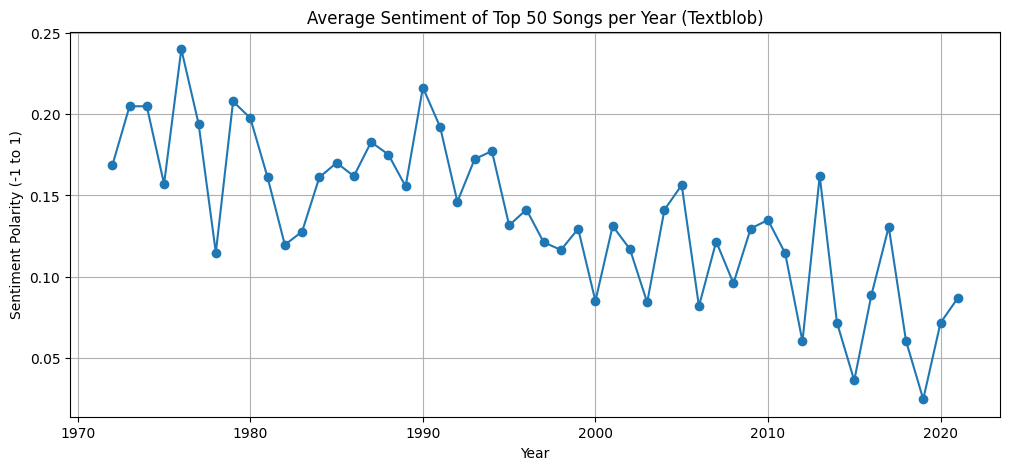

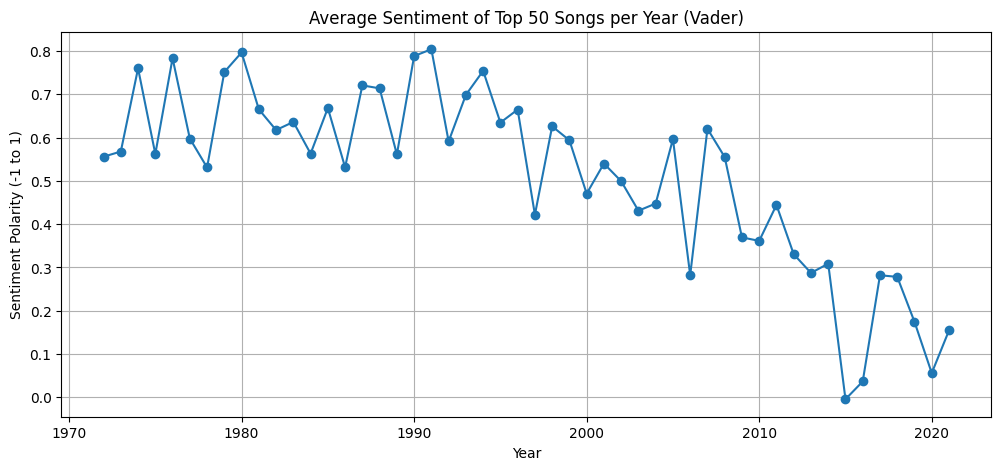

In [226]:
import matplotlib.pyplot as plt

df_full.groupby("Year")["Sentiment(textblob)"].mean().plot(kind="line", marker='o', figsize=(12, 5))
plt.title("Average Sentiment of Top 50 Songs per Year (Textblob)")
plt.ylabel("Sentiment Polarity (-1 to 1)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

df_full.groupby("Year")["Sentiment(vader)"].mean().plot(kind="line", marker='o', figsize=(12, 5))
plt.title("Average Sentiment of Top 50 Songs per Year (Vader)")
plt.ylabel("Sentiment Polarity (-1 to 1)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

In [227]:
df_full["Sentiment(textblob)"].describe()

count    2496.000000
mean        0.136840
std         0.182668
min        -0.700000
25%         0.012006
50%         0.133038
75%         0.250476
max         1.000000
Name: Sentiment(textblob), dtype: float64

In [ ]:
# Define the list of misogynistic words
misogynistic_words = [
    "pussy", "bitch", "bitches", "sluts", "hoe", "slag", "whore", "female", "booty", "gold digger",
    "side chick", "thot", "bunny", "brick house", "tart", "milf", "prude", "frigid", "good girl", 
    "tits", "breasts", "sex toy", "bimbo", "cunt",  "vagina", "her body", "that body", "fuck her",
    "shake that", "yo body", "good girls", "ass", "daddy", "chick", "sex", "sexy", "arse", "ho", "choke her",
]

# Create a regex pattern to match whole words only (case-insensitive)
pattern_dict = {word: re.compile(rf'\b{re.escape(word)}\b', flags=re.IGNORECASE) for word in misogynistic_words}

# Count occurrences of each word across all lyrics, 
word_counts = {word: 0 for word in misogynistic_words}

for lyric in df_full["Lyrics"].dropna():
    for word, pattern in pattern_dict.items():
        word_counts[word] += len(pattern.findall(lyric))

# Convert to DataFrame for display
word_counts_df = pd.DataFrame.from_dict(word_counts, orient="index", columns=["Count"])
word_counts_df = word_counts_df.sort_values(by="Count", ascending=False)

# Show results
print(word_counts_df)


             Count
bitch          820
ass            406
ho             325
sexy           234
daddy          231
booty          197
bitches        177
sex            158
pussy           93
chick           92
shake that      78
that body       71
good girl       47
good girls      33
thot            20
whore           11
her body        10
bunny            9
bimbo            8
breasts          6
fuck her         5
hoe              5
tits             3
female           3
side chick       2
tart             2
gold digger      2
brick house      1
vagina           1
slag             0
sluts            0
sex toy          0
milf             0
prude            0
frigid           0
yo body          0
cunt             0
arse             0
choke her        0


In [229]:
# Compile a regex pattern to match the words (case-insensitive)
pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, misogynistic_words)) + r')\b', re.IGNORECASE)

# Count how many misogynistic terms appear in each lyric
df_full["Misogynistic_Word_Count"] = df_full["Lyrics"].apply(lambda x: len(pattern.findall(x)) if isinstance(x, str) else 0)

# Flag whether the song is misogynistic (any count > 0)
df_full["Is_Misogynistic"] = df_full["Misogynistic_Word_Count"] > 0

# 📊 Group by year and summarize
summary = df_full.groupby("Year").agg(
    Songs_Checked=("Lyrics", "count"),
    Misogynistic_Songs=("Is_Misogynistic", "sum"),
    Total_Misogynistic_Words=("Misogynistic_Word_Count", "sum")
).reset_index()

# Add % of misogynistic songs
summary["Percentage_Misogynistic_Songs"] = (
    summary["Misogynistic_Songs"] / summary["Songs_Checked"] * 100
)

# Preview
summary.head()

# Optional: Save for plotting later
summary.to_csv("misogyny_by_year.csv", index=False)

summary.head(50)

,Year,Songs_Checked,Misogynistic_Songs,Total_Misogynistic_Words,Percentage_Misogynistic_Songs
0,1972,50,4,22,8.000000
1,1973,50,4,16,8.000000
2,1974,50,4,6,8.000000
3,1975,50,5,12,10.000000
4,1976,50,4,66,8.000000
5,1977,50,3,9,6.000000
6,1978,50,2,5,4.000000
7,1979,50,3,14,6.000000
8,1980,50,2,5,4.000000
9,1981,50,0,0,0.000000
